# Heat Exchange Experimental Data Analysis
Presented by Rahil Shaik, Alex Quemel, Ethan Mibu, Sneha Kancharla

In [2233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Pre-processing

In [2234]:
df_shell_cc = pd.read_csv("data/MW1_Shell_Counter_Current_formatted.csv")
df_shell_uni = pd.read_csv("data/MW1_Shell_Uni_Flow_formatted.csv")

df_tube_cross_350c_200h = pd.read_csv("data/tubular_cross_data/tubular_cross_350c_200h - tubular_counter_350c_300h.csv")
df_tube_cross_350c_300h = pd.read_csv("data/tubular_cross_data/tubular_counter_350c_300h - tubular_counter_350c_300h.csv")
df_tube_cross_350c_350h = pd.read_csv("data/tubular_cross_data/tubular_counter_350c_350h - tubular_counter_350c_350h.csv")
df_tube_cross_350c_400h = pd.read_csv("data/tubular_cross_data/tubular_counter_350c_400h - tubular_counter_350c_400h.csv")

df_tube_cross_350h_200c = pd.read_csv("data/tubular_cross_data/tubular_cross_350h_200c - tubular_counter_350c_200h.csv")
df_tube_cross_350h_300c = pd.read_csv("data/tubular_cross_data/tubular_cross_350h_300c - WL315C_2025-01-30_14-58-01.csv")
df_tube_cross_350h_350c = pd.read_csv("data/tubular_cross_data/tubular_cross_350h_350c - WL315C_2025-01-30_14-59-40.csv")
df_tube_cross_350h_400c = pd.read_csv("data/tubular_cross_data/tubular_cross_350h_400c - WL315C_2025-01-30_15-05-57.csv")

df_plate_cc = pd.read_csv("data/plate_counter_extra.csv")
df_plate_uni = pd.read_csv("data/plate_parallel_extra.csv")

df_water_air_cc = pd.read_csv("data/finned_counter_extra.csv")
df_water_air_uni = pd.read_csv("data/finned_parallel_extra.csv")

In [2235]:
df_tube_cross_350c_200h["hot flow (L/hr)"] = 200
df_tube_cross_350c_200h["cold flow (L/hr)"] = 350

df_tube_cross_350c_300h["hot flow (L/hr)"] = 300
df_tube_cross_350c_300h["cold flow (L/hr)"] = 350

df_tube_cross_350c_350h["hot flow (L/hr)"] = 350
df_tube_cross_350c_350h["cold flow (L/hr)"] = 350

df_tube_cross_350c_400h["hot flow (L/hr)"] = 400
df_tube_cross_350c_400h["cold flow (L/hr)"] = 350

df_tube_cross_350h_200c["hot flow (L/hr)"] = 350
df_tube_cross_350h_200c["cold flow (L/hr)"] = 200

df_tube_cross_350h_300c["hot flow (L/hr)"] = 350
df_tube_cross_350h_300c["cold flow (L/hr)"] = 300

df_tube_cross_350h_350c["hot flow (L/hr)"] = 350
df_tube_cross_350h_350c["cold flow (L/hr)"] = 350

df_tube_cross_350h_400c["hot flow (L/hr)"] = 350
df_tube_cross_350h_400c["cold flow (L/hr)"] = 400


In [2236]:
df_tube_cross_350c_200h["hot flow (m^3/s)"] = df_tube_cross_350c_200h["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350c_200h["cold flow (m^3/s)"] = df_tube_cross_350c_200h["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350c_300h["hot flow (m^3/s)"] = df_tube_cross_350c_300h["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350c_300h["cold flow (m^3/s)"] = df_tube_cross_350c_300h["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350c_350h["hot flow (m^3/s)"] = df_tube_cross_350c_350h["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350c_350h["cold flow (m^3/s)"] = df_tube_cross_350c_350h["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350c_400h["hot flow (m^3/s)"] = df_tube_cross_350c_400h["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350c_400h["cold flow (m^3/s)"] = df_tube_cross_350c_400h["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350h_200c["hot flow (m^3/s)"] = df_tube_cross_350h_200c["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350h_200c["cold flow (m^3/s)"] = df_tube_cross_350h_200c["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350h_300c["hot flow (m^3/s)"] = df_tube_cross_350h_300c["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350h_300c["cold flow (m^3/s)"] = df_tube_cross_350h_300c["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350h_350c["hot flow (m^3/s)"] = df_tube_cross_350h_350c["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350h_350c["cold flow (m^3/s)"] = df_tube_cross_350h_350c["cold flow (L/hr)"] / (1000 * 3600)

df_tube_cross_350h_400c["hot flow (m^3/s)"] = df_tube_cross_350h_400c["hot flow (L/hr)"] / (1000 * 3600)
df_tube_cross_350h_400c["cold flow (m^3/s)"] = df_tube_cross_350h_400c["cold flow (L/hr)"] / (1000 * 3600)


In [2237]:
dfs = [df_tube_cross_350c_200h, df_tube_cross_350c_300h, df_tube_cross_350c_350h, df_tube_cross_350c_400h,
       df_tube_cross_350h_200c, df_tube_cross_350h_300c, df_tube_cross_350h_350c, df_tube_cross_350h_400c ]

In [2238]:
df_tube_cross_350c_200h.head(5)

,Time,T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C),T9 (°C),T10 (°C),dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW),hot flow (L/hr),cold flow (L/hr),hot flow (m^3/s),cold flow (m^3/s)
0,2/13/2025 4:29:46 PM.43,31.6,100,20.2,29.2,34.3,22,36.5,24.5,39.2,26.6,0.09,8,-23.72,3.64,0,13.68,200,350,0.000056,0.000097
1,2/13/2025 4:29:46 PM.93,31.6,100,20.2,29.2,34.3,22,36.5,24.5,39.2,26.6,0.09,9,-23.85,3.63,0,13.74,200,350,0.000056,0.000097
2,2/13/2025 4:29:47 PM.43,31.6,100,20.2,29.2,34.3,22,36.5,24.6,39.2,26.5,0.10,9,-23.81,3.66,0,13.74,200,350,0.000056,0.000097
3,2/13/2025 4:29:47 PM.93,31.6,100,20.2,29.2,34.3,22,36.5,24.5,39.2,26.6,0.10,8,-23.96,3.65,0,13.81,200,350,0.000056,0.000097
4,2/13/2025 4:29:48 PM.43,31.6,100,20.2,29.2,34.3,22,36.5,24.5,39.2,26.6,0.10,8,-23.95,3.63,0,13.79,200,350,0.000056,0.000097


## Analysis Question 1

Experimentally determine the overall heat transfer coefficient (U) and effectiveness (ε) of
each of the four heat exchangers under identical conditions.

#### Quantity Functions

In [2239]:
shell_parallel = pd.read_csv('q1/shell_parallel.csv')
shell_counter = pd.read_csv('q1/shell_counter.csv')
plate_parallel = pd.read_csv('q1/plate_parallel_extra.csv')
plate_counter = pd.read_csv('q1/plate_counter_extra.csv')
tube_parallel = pd.read_csv('q1/tube_parallel.csv')
tube_counter = pd.read_csv('q1/tube_counter.csv')
finned_parallel = pd.read_csv('q1/finned_parallel_extra.csv')
finned_counter = pd.read_csv('q1/finned_counter_extra.csv')

In [2240]:
def cleaner(df):
    df = df.dropna(axis=0)
    new_headers = df.iloc[0].values
    df = pd.DataFrame(df.iloc[1:].values, columns=new_headers)
    df = df.reset_index(drop=True)
    df = df.iloc[:, 1:]
    df = df.astype(float)
    df = df.drop(df.columns[4:10], axis=1)
    return df

shell_parallel = cleaner(shell_parallel)
shell_counter = cleaner(shell_counter)
plate_parallel = cleaner(plate_parallel)
plate_counter = cleaner(plate_counter)
tube_parallel = cleaner(tube_parallel)
tube_counter = cleaner(tube_counter)
finned_parallel = cleaner(finned_parallel)
finned_counter = cleaner(finned_counter)

#### Background Information
Newton's law of cooling (Equation 2)
$$q_s=h\Delta T$$
where $q_s$ is the heat flux $[\frac{W}{m^2}]$ from the surface, $h$ is the convective heat transfer coefficient $[\frac{W}{m^2 \cdot K}]$, and $\Delta T$ is the temperature difference $[K]$ between the surface and bulk fluid. The ability to transfer heat from the medium to the wall, or vice versa, is described by the heat transfer coefficient, $h$, as defined by Eqn. (2). Within the dividing wall, heat is transferred from the hot side to the cold side by thermal conduction, as described by Eqn. (1). At steady state, the following expression equates the heat flux to, through, and from the wall:

$$q=h_1\Delta T_1=\frac{k\Delta T_W}{s}=h_2\Delta T_2=U\Delta T$$ 

$(3)$

where $\Delta T$ values are as defined in Figure 2, $s$ is the thickness of the dividing wall, and $U$ is the overall heat transfer coefficient of the heat exchanger. $U$ characterizes the heat exchanger, and is represented as the sum of a series of thermal resistances:
$$U=\frac{1}{\frac{1}{h_1}+\frac{s}{k}+
\frac{1}{h_2}}$$

$(4)$

Log mean temperature difference, $\Delta T_{LM}$, must be used to represent the driving force. The general formula for LMTD is

$\Delta T_{LM} = \frac{\Delta T_a - \Delta T_b}{ln(\frac{\Delta T_a}{\Delta T_b})}$

where

$\Delta T_a:$ Temperature difference at one end of the heat exchanger.

$\Delta T_b:$ Temperature difference at the other end of the heat exchanger 

For co-current flow log mean temperature difference is:

$\Delta T_{LM}=\frac{(T_{1i}-T_{2i})-(T_{1o}-T_{2o})}{ln(\frac{T_{1i}-T_{2i}}{T_{1o}-T_{2o}})}$

$(5b)$

Subscripts i and o in Eqn. (5b) represent inlet and outlet streams, respectively. Additional considerations are required when the surface areas of the hot and cold side are different in size, as in the case of a tubular heat exchanger. 

The heat transfer rate (heat duty) of a heat exchanger can be calculated with an energy balance on the hot or cold fluid:

$\dot Q_H=\dot m_h \cdot c_{p,h} \cdot (\Delta T)_h$

$\dot Q_c = \dot m_c \cdot c_{p,c} \cdot (\Delta T)_c$

$(6)$

where $\dot m$ is the mass flow rate and $c_p$ is the specific heat capacity. In an ideal heat exchanger without losses,

$\dot Q = - \dot Q_H = \dot Q_C$

Instead use the mean exchanged heat flow, $\dot Q_M$, and mean area, $A_M$, to calculate the overall heat transfer coefficient for a given heat exchanger.

$U = \frac{\dot Q_M}{A_M \cdot \Delta T_{LM}}$

$\dot Q_M = \frac{|\dot Q_C|+|\dot Q_H|}{2}$

$(9)$

For a tubular heat exchanger, the mean area is given by:

$A_M = \frac{A_{outer} - A_{inner}}{ln(\frac{A_{outer}}{A_{inner}})} = \frac{\pi L (D_{t,o}-D_{t,i})}{ln(\frac{D_{t,o}}{D_t,i})}$

$(10)$

where $D_{t,i}$ represents the inner tube diameter, $D_{t,o}$ is the outer tube diameter, and $L$ is the length of the tube.

#### Effectiveness, $\epsilon$

$\epsilon = \frac{\dot Q_{actual}}{\dot Q_max}=\frac{\dot Q_M}{C_{min}(T_{hi}-T_{Ci})}$

$C_h=\dot m_h c_{p,h}$

$C_C=\dot m_c c_{p,c}$

$C_{min}=min(C_h,C_c)$

where

$\dot Q_{actual}$ is the actual amount of heat transferred by heat exchanger

$\dot Q_{max}$ is the maximum amount of heat that could be transferred if one of the fluids were to be heated or cooled to the temperature of the other fluid at the inlet

$C=\dot m c_p$ represents the heat capacity rate

$C_{min}$ is the minimum heat capacity rate (the smaller of the hot or cold fluid's heat capacity rate)

In [2241]:
def calculate_Qh(m, c_p, Delta_T):
    return m * c_p * Delta_T

def calculate_Qc(m, c_p, Delta_T):
    return m * c_p * Delta_T

def calculate_QM(Qc,Qh):
    return (np.abs(Qc) + np.abs(Qh))/2

def calculate_LMTD(Delta_Ta, Delta_Tb):
    return (Delta_Ta - Delta_Tb)/(np.log(Delta_Ta/Delta_Tb))

def calculate_cocurrent_LMTD(T_1i, T_2i, T_1o, T_2o):
    return ((T_1i - T_2i) - (T_1o - T_2o)) / np.log((T_1i - T_2i) / (T_1o - T_2o))

def calculate_A_M_tubular(D_to, D_ti, L):
    return (np.pi*L*(D_to - D_ti))/np.log(D_to/D_ti)

def calculate_U(QM, A_M, LMTD):
    return QM/(A_M*LMTD)

#### System Parameters

In [2242]:
c_p = 4184 #J/(kg*C) #Specific heat capacity of water

#### Example calculation of overall heat transfer coefficient with shell-tube heat exchanger (both parallel and counter flow)

In [2243]:
cold_inlet_temp = shell_parallel['T3 (°C)'].mean()
hot_inlet_temp = shell_parallel['T1 (°C)'].mean()
cold_outlet_temp = shell_parallel['T4 (°C)'].mean()
hot_outlet_temp = shell_parallel['T2 (°C)'].mean()
QM = shell_parallel['dQm/dt (kW)'].mean() * 1000
A_M = 0.15 #m^2

Compute LMTD and U

In [2244]:
Delta_Ta = hot_inlet_temp - cold_outlet_temp
Delta_Tb = hot_outlet_temp - cold_inlet_temp

LMTD = calculate_LMTD(Delta_Ta, Delta_Tb)
U = calculate_U(QM, A_M, LMTD)

print("U (shell heat exchanger with parallel flow):",U,"W/m²·K")

U (shell heat exchanger with parallel flow): 958.0758533838674 W/m²·K


#### Define a general functions to calculate overall heat transfer coefficients for every flow heat exchanger

#### For parallel flows

In [2245]:
def parallel_U(df, A_M):
    QM = df['dQm/dt (kW)'].mean() * 1000
    
    first_four_columns = df.iloc[:, :4]
    flat_values = first_four_columns.mean(axis=0).values
    unique_sorted_values = np.sort(np.unique(flat_values))
    
    cold_inlet_temp = unique_sorted_values[0]   
    cold_outlet_temp = unique_sorted_values[1]   
    hot_outlet_temp = unique_sorted_values[2]    
    hot_inlet_temp = unique_sorted_values[3]

    Delta_Ta = hot_inlet_temp - cold_outlet_temp
    Delta_Tb = hot_outlet_temp - cold_inlet_temp

    LMTD = calculate_LMTD(Delta_Ta, Delta_Tb)
    U = calculate_U(QM, A_M, LMTD)
    return np.array([U, cold_inlet_temp, cold_outlet_temp, hot_outlet_temp, hot_inlet_temp, QM])

#### For counter flows

In [2246]:
def counter_U(df, A_M):
    QM = df['dQm/dt (kW)'].mean() * 1000
    
    first_four_columns = df.iloc[:, :4]
    flat_values = first_four_columns.mean(axis=0).values
    unique_sorted_values = np.sort(np.unique(flat_values))
    
    cold_inlet_temp = unique_sorted_values[0]   
    cold_outlet_temp = unique_sorted_values[1]   
    hot_outlet_temp = unique_sorted_values[2]    
    hot_inlet_temp = unique_sorted_values[3]

    LMTD = calculate_cocurrent_LMTD(hot_inlet_temp,cold_inlet_temp,hot_outlet_temp,cold_outlet_temp)
    U = calculate_U(QM, A_M, LMTD)
    return np.array([U, cold_inlet_temp, cold_outlet_temp, hot_outlet_temp, hot_inlet_temp, QM])

#### Apply to every heat exchanger

In [2247]:
shell_counter_U = counter_U(shell_counter, A_M)
shell_parallel_U = parallel_U(shell_parallel, A_M)
finned_counter_U = counter_U(finned_counter, 2.77)
finned_parallel_U = parallel_U(finned_parallel, 2.77)
plate_counter_U = counter_U(plate_counter, 0.13932)
plate_parallel_U = parallel_U(plate_parallel, 0.13932)
tube_counter_U = counter_U(tube_counter, 0.0698)
tube_parallel_U = parallel_U(tube_parallel, 0.0698)
shell_parallel_U

array([ 958.07585338,   15.23      ,   21.687     ,   33.002     ,
         40.094     , 2599.4       ])

### New Data Frame With Calculated Values

In [2248]:
dfQ1 = pd.DataFrame(columns=["U", "T_ci", "T_co", "T_ho", "T_hi", "Q_M"])

data_arrays = [
    shell_counter_U,
    shell_parallel_U,
    finned_counter_U,
    finned_parallel_U,
    plate_counter_U,
    plate_parallel_U,
    tube_counter_U,
    tube_parallel_U
]

dfQ1 = pd.DataFrame(data_arrays, columns=["U", "T_ci", "T_co", "T_ho", "T_hi", "Q_M"])

dfQ1.insert(0, 'Heat Exchanger Type', np.array([
    'Shell Counter', 
    'Shell Parallel',
    'Finned Counter',
    'Finned Parallel',
    'Plate Counter',
    'Plate Parallel',
    'Tube Counter',
    'Tube Parallel'
]))
dfQ1

,Heat Exchanger Type,U,T_ci,T_co,T_ho,T_hi,Q_M
0,Shell Counter,1150.253588,15.351,22.202,32.284,40.139,2820.5
1,Shell Parallel,958.075853,15.230,21.687,33.002,40.094,2599.4
2,Finned Counter,49.486788,26.490,32.596,39.586,43.468,1542.8
3,Finned Parallel,54.429328,26.444,33.438,39.300,43.426,1713.0
4,Plate Counter,3510.638952,21.694,28.938,32.812,41.262,4739.4
5,Plate Parallel,2522.359438,20.420,30.064,31.706,41.986,4076.8
6,Tube Counter,6465.400106,21.821,27.312,30.769,37.904,3706.3
7,Tube Parallel,5447.766559,21.821,27.312,30.769,37.904,3706.3


### Effectiveness Calculation

In [2249]:
def calculate_effectiveness(Q_M,C_min,T_hi,T_ci):
    return Q_M/(C_min*(T_hi-T_ci))
    
def calculate_C_min(m_dot,c_p):
    return m_dot * c_p

In [2250]:
c_p = 4184 #Negligible difference at this range of temperatures #But recognize that the hot water c_p is smaller
flow_rates = np.array([313,313,315,315,313,311,277,277]) * 2.78 * 10**-7 #m^3/s
m_dot = flow_rates * 998.2 #kg/s

### Evaluating effectiveness for each heat exchanger

In [2251]:
dfQ1['m_dot'] = m_dot

dfQ1['C_min'] = dfQ1['m_dot'].apply(lambda m: calculate_C_min(m, c_p))
dfQ1['effectiveness'] = dfQ1.apply(lambda row: calculate_effectiveness(row['Q_M'], row['C_min'], row['T_hi'], row['T_ci']), axis=1)
dfQ1

,Heat Exchanger Type,U,T_ci,T_co,T_ho,T_hi,Q_M,m_dot,C_min,effectiveness
0,Shell Counter,1150.253588,15.351,22.202,32.284,40.139,2820.5,0.086857,363.411256,0.313102
1,Shell Parallel,958.075853,15.230,21.687,33.002,40.094,2599.4,0.086857,363.411256,0.287676
2,Finned Counter,49.486788,26.490,32.596,39.586,43.468,1542.8,0.087412,365.733373,0.248461
3,Finned Parallel,54.429328,26.444,33.438,39.300,43.426,1713.0,0.087412,365.733373,0.275806
4,Plate Counter,3510.638952,21.694,28.938,32.812,41.262,4739.4,0.086857,363.411256,0.666467
5,Plate Parallel,2522.359438,20.420,30.064,31.706,41.986,4076.8,0.086302,361.089140,0.523523
6,Tube Counter,6465.400106,21.821,27.312,30.769,37.904,3706.3,0.076867,321.613156,0.716539
7,Tube Parallel,5447.766559,21.821,27.312,30.769,37.904,3706.3,0.076867,321.613156,0.716539


## Analysis Question 3
For the tubular heat exchanger in counter-current flow configuration:

(a) Identify and report appropriate correlations for predicting the heat transfer
coefficients for the inner tube ($h_i$) and the annular region ($h_0$). Clearly state the
conditions and assumptions under which these correlations are valid (flow regime,
flow condition, characteristic length, etc.).

The first step in determining the appropriate correlations for the heat transfer coefficient in an inner tube is investigating the flow regime using Reynolds number, $Re$, to classify the flow as laminar or turbulent

$$
Re = \frac{\rho u D}{\mu} = \frac{4 \dot m}{\pi D \mu} 
$$

$$
\text{where} \  \dot m = \rho \dot q 
$$

We will use the LHS for classifying flow regime

In [2252]:
mu = 0.001 # Pa * s
rho = 1000 # kg / m^3
D_inner = 6 * 1e-3 # m
D_annular = 13 * 1e-3 # m 
D_hydraulic = D_annular - D_inner # m
L = 3.2 # m
k_cold = 0.592 # W / mK
k_hot = 0.613 # W / mK #TODO: update these thermal conductivity values

A_i = np.pi * (D_inner ** 2) / 4
A_h = np.pi * ((D_annular ** 2) - ((D_hydraulic) ** 2)) / 4
A_h

9.424777960769381e-05

In [2253]:
for df in dfs:
    df["u_cold (m/s)"] = df["cold flow (m^3/s)"] / A_i
    df["u_hot (m/s)"] = df["hot flow (m^3/s)"] / A_h
    df["Re_cold (inner tube)"] = (rho * df["u_cold (m/s)"] * D_inner) / mu
    df["Re_hot (annular region)"] = (rho * df["u_hot (m/s)"] * D_inner) / mu

In [2254]:
for df in dfs:
    print(df["Re_cold (inner tube)"].mean())

20631.196326727175
20631.196326727175
20631.196326727175
20631.19632672718
11789.255043844101
17683.88256576615
20631.196326727175
23578.510087688202


In [2255]:
df_tube_cross_350h_350c.head(5)

,Time,T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C),T9 (°C),T10 (°C),dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW),hot flow (L/hr),cold flow (L/hr),hot flow (m^3/s),cold flow (m^3/s),u_cold (m/s),u_hot (m/s),Re_cold (inner tube),Re_hot (annular region)
0,1/30/2025 2:21:15 PM.19,32.9,48.0,20.8,30.1,35.2,22.5,37.3,25.0,39.6,27.2,0.08,1000,-6.17,3.80,0,4.99,350,350,0.000097,0.000097,3.438533,1.03156,20631.196327,6189.358898
1,1/30/2025 2:21:15 PM.69,32.9,48.0,20.7,30.0,35.2,22.5,37.3,25.0,39.6,27.2,0.09,1000,-6.12,3.77,0,4.95,350,350,0.000097,0.000097,3.438533,1.03156,20631.196327,6189.358898
2,1/30/2025 2:21:16 PM.19,32.9,48.0,20.8,30.0,35.2,22.5,37.3,25.0,39.7,27.3,0.09,1000,-6.17,3.81,0,4.99,350,350,0.000097,0.000097,3.438533,1.03156,20631.196327,6189.358898
3,1/30/2025 2:21:16 PM.69,32.8,48.0,20.7,30.0,35.2,22.5,37.3,25.0,39.6,27.2,0.09,1000,-6.21,3.81,0,5.01,350,350,0.000097,0.000097,3.438533,1.03156,20631.196327,6189.358898
4,1/30/2025 2:21:17 PM.19,32.8,48.1,20.8,30.1,35.1,22.5,37.3,25.0,39.6,27.3,0.09,1000,-6.21,3.81,0,5.01,350,350,0.000097,0.000097,3.438533,1.03156,20631.196327,6189.358898


Looks like all flow is turbulent, but we will handle both cases

For laminar flow, we use equation (20-27) from the fundamentals textbook:

$$
Nu_D = 1.86 (Pe( \frac{D}{L})^\frac{1}{3})(\frac{\mu_b}{\mu_w})^{0.14}
$$

and for turbulent flow, we will use Dittus Boelter equation (20-28):

$$
Nu_D = 0.023 Re_D ^ {0.8} Pr^n
$$

$$
\text{where } n_{heated} = 0.4 \text{ and } n_{cooled} = 0.3
$$

**When making slides, reference pages 307 and 308 for assumptions of these two equations**

Once we have these $Nu$ values, we can solve for heat transfer coefficients as

$$
h = \frac{Nu \times k}{D}
$$

In [2256]:
df_tube_cross_350h_200c.head(5)

,Time,T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C),T9 (°C),T10 (°C),dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW),hot flow (L/hr),cold flow (L/hr),hot flow (m^3/s),cold flow (m^3/s),u_cold (m/s),u_hot (m/s),Re_cold (inner tube),Re_hot (annular region)
0,2/13/2025 4:12:29 PM.43,27.7,100,17.9,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.10,11,-16.66,3.22,0,9.94,350,200,0.000097,0.000056,1.964876,1.03156,11789.255044,6189.358898
1,2/13/2025 4:12:29 PM.93,27.7,100,17.9,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.09,11,-16.66,3.20,0,9.93,350,200,0.000097,0.000056,1.964876,1.03156,11789.255044,6189.358898
2,2/13/2025 4:12:30 PM.43,27.7,100,17.8,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.09,10,-16.54,3.20,0,9.87,350,200,0.000097,0.000056,1.964876,1.03156,11789.255044,6189.358898
3,2/13/2025 4:12:30 PM.93,27.7,100,17.9,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.10,11,-16.42,3.18,0,9.80,350,200,0.000097,0.000056,1.964876,1.03156,11789.255044,6189.358898
4,2/13/2025 4:12:31 PM.43,27.6,100,17.8,25.8,30.7,19.2,33.6,21.3,37.3,23.2,0.09,10,-16.56,3.23,0,9.90,350,200,0.000097,0.000056,1.964876,1.03156,11789.255044,6189.358898


(b) Using empirical correlations, calculate and report the inner tube ($h_i$) and annular region ($h_0$) heat transfer coefficients at a volumetric flow rate of 350 L/hr.

We will be using data from when both hot and cold streams are art 350 L/min given in `df_tube_cross_350h_350c`

In [2257]:
pd.set_option("display.max_columns", None)
df_tube_cross_350h_350c.head()

,Time,T1 (°C),T2 (°C),T3 (°C),T4 (°C),T5 (°C),T6 (°C),T7 (°C),T8 (°C),T9 (°C),T10 (°C),dp1 (mbar),dp2 (mbar),dQ1/dt (kW),dQ2/dt (kW),dQ3/dt (kW),dQm/dt (kW),hot flow (L/hr),cold flow (L/hr),hot flow (m^3/s),cold flow (m^3/s),u_cold (m/s),u_hot (m/s),Re_cold (inner tube),Re_hot (annular region)
0,1/30/2025 2:21:15 PM.19,32.9,48.0,20.8,30.1,35.2,22.5,37.3,25.0,39.6,27.2,0.08,1000,-6.17,3.80,0,4.99,350,350,0.000097,0.000097,3.438533,1.03156,20631.196327,6189.358898
1,1/30/2025 2:21:15 PM.69,32.9,48.0,20.7,30.0,35.2,22.5,37.3,25.0,39.6,27.2,0.09,1000,-6.12,3.77,0,4.95,350,350,0.000097,0.000097,3.438533,1.03156,20631.196327,6189.358898
2,1/30/2025 2:21:16 PM.19,32.9,48.0,20.8,30.0,35.2,22.5,37.3,25.0,39.7,27.3,0.09,1000,-6.17,3.81,0,4.99,350,350,0.000097,0.000097,3.438533,1.03156,20631.196327,6189.358898
3,1/30/2025 2:21:16 PM.69,32.8,48.0,20.7,30.0,35.2,22.5,37.3,25.0,39.6,27.2,0.09,1000,-6.21,3.81,0,5.01,350,350,0.000097,0.000097,3.438533,1.03156,20631.196327,6189.358898
4,1/30/2025 2:21:17 PM.19,32.8,48.1,20.8,30.1,35.1,22.5,37.3,25.0,39.6,27.3,0.09,1000,-6.21,3.81,0,5.01,350,350,0.000097,0.000097,3.438533,1.03156,20631.196327,6189.358898


Both flow regimes are laminar in this case as inner tube and annular flow is $< 2300$, so we will use equation (20-27)

$$
Nu_D = 1.86 (Pe( \frac{D}{L})^\frac{1}{3})(\frac{\mu_b}{\mu_w})^{0.14}
$$

In order, to get Peclet number, $Pe$, we must solve for it using $Re$ and $Pr$. From _Fundamentals of Momentum, Heat and Mass_, table A.6 $35 \degree \text{C}$

In [2258]:
Cp = 4180 #kJ/ kg K

In [2259]:
for df in dfs:
    df["Pr_cold (inner tube)"] = (Cp * mu) / k_cold
    df["Pr_hot (annular region)"] = (Cp * mu) / k_hot

In [2260]:
df_tube_cross_350h_350c["Pe_cold (inner tube)"] = df_tube_cross_350h_350c["Re_cold (inner tube)"] * df_tube_cross_350h_350c["Pr_cold (inner tube)"]
df_tube_cross_350h_350c["Pe_hot (annular region)"] = df_tube_cross_350h_350c["Re_hot (annular region)"] * df_tube_cross_350h_350c["Pr_hot (annular region)"]

In [2261]:
T_c_bulk = 16 + 273.15 # K
T_h_bulk = 39 + 273.15 # K

T_wall = (T_c_bulk + T_h_bulk) / 2 # K
T_wall

300.65

To get $\mu_w$ we will assume that the wall between the hot and cold tube is at the average of the hot and cold water flow temperatures which from our experiment we have as:

$$
T_{c, bulk} = 16 \degree C \text{ and } T_{h, bulk} = 39 \degree \text{C}
$$

using the bulk temperatures and this, we can get viscosities from the below expression which has dependence on the thermometer readings across the tubes

$$
\mu(T1 - T8) \text{ mPa s}
$$

$$
\mu_w(T = 22.5 \degree \text{C}) = 0.911 \text{ mPa s}
$$



**confirm this viscosity formula**

In [2262]:
mu_w = 0.911 / 1000 # Pa * s

def vogel(T_C):
    A = 2.414e-5
    B = 247.8
    C = 140
    mu_mPa_s = A * 10**(B / ((T_C+273.15) - C))  # in mPa·s
    mu_Pa_s = mu_mPa_s / 1000      # convert to Pa·s
    return mu_Pa_s

In [2263]:
mean_temps = df_tube_cross_350h_350c.mean(numeric_only=True)

In [2264]:
mean_temps

T1 (°C)                        32.816000
T2 (°C)                        48.014000
T3 (°C)                        20.634000
T4 (°C)                        30.006000
T5 (°C)                        35.194000
T6 (°C)                        22.500000
T7 (°C)                        37.300000
T8 (°C)                        25.086000
T9 (°C)                        39.616000
T10 (°C)                       27.274000
dp1 (mbar)                      0.083200
dp2 (mbar)                   1000.000000
dQ1/dt (kW)                    -6.188600
dQ2/dt (kW)                     3.845400
dQ3/dt (kW)                     0.000000
dQm/dt (kW)                     5.017800
hot flow (L/hr)               350.000000
cold flow (L/hr)              350.000000
hot flow (m^3/s)                0.000097
cold flow (m^3/s)               0.000097
u_cold (m/s)                    3.438533
u_hot (m/s)                     1.031560
Re_cold (inner tube)        20631.196327
Re_hot (annular region)      6189.358898
Pr_cold (inner t

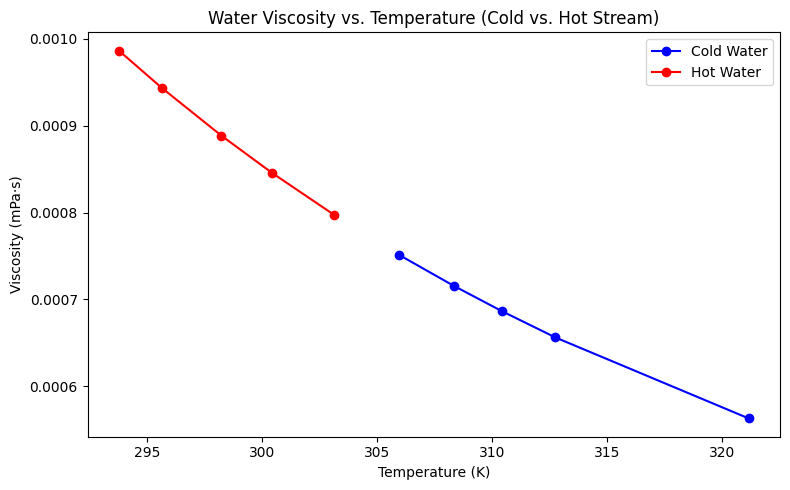

In [2265]:
cold_thermocouples = ["T1 (°C)", "T5 (°C)", "T7 (°C)", "T9 (°C)", "T2 (°C)"]   # cold water path
hot_thermocouples  = ["T3 (°C)", "T6 (°C)", "T8 (°C)", "T10 (°C)", "T4 (°C)"]  # hot water path

cold_temps = np.array([mean_temps[t] for t in cold_thermocouples])
hot_temps  = np.array([mean_temps[t] for t in hot_thermocouples])

cold_visc = np.array([vogel(T) for T in cold_temps])
hot_visc  = np.array([vogel(T) for T in hot_temps])

plt.figure(figsize=(8, 5))
plt.plot([cold_temp +273.15 for cold_temp in cold_temps], cold_visc * 1e3, 'bo-', label='Cold Water')  # mPa·s
plt.plot([hot_temp +273.15 for hot_temp in hot_temps],  hot_visc  * 1e3, 'ro-', label='Hot Water')   # mPa·s
plt.xlabel("Temperature (K)")
plt.ylabel("Viscosity (mPa·s)")
plt.title("Water Viscosity vs. Temperature (Cold vs. Hot Stream)")
plt.legend()
plt.tight_layout()
plt.show()


In [2266]:
print(df_tube_cross_350h_350c["Pe_cold (inner tube)"].mean())

145672.97406371555


In [2267]:
# Nu_cold = 1.86 * df_tube_cross_350h_350c["Pe_cold (inner tube)"].mean() * (D_inner/L) ** (1/3) * (cold_visc / mu_w) ** 0.14
# Nu_hot = 1.86 * df_tube_cross_350h_350c["Pe_hot (annular region)"].mean() * (D_annular/L) ** (1/3) * (hot_visc / mu_w) ** 0.14

In [2268]:
# Nu_cold

The final step is computing heat transfer coefficient as

$$
h = \frac{Nu \times k}{D}
$$

In [2269]:
# h_cold = (Nu_cold * k_cold) / D_inner
# h_hot = (Nu_hot * k_hot) / D_annular

In [2270]:
# h_cold

We can also try turbulent flow

$$
Nu_D = 0.023 Re_D ^ {0.8} Pr^n
$$

$$
\text{where } n_{heated} = 0.4 \text{ and } n_{cooled} = 0.3
$$


In [2271]:
Nu_turb_cold = 0.023 * (df_tube_cross_350h_350c["Re_cold (inner tube)"] ** 0.8) * df["Pr_cold (inner tube)"] ** 0.4
Nu_turb_hot = 0.023 * (df_tube_cross_350h_350c["Re_hot (annular region)"] ** 0.8) * df["Pr_hot (annular region)"] ** 0.4

h_hot = (Nu_turb_hot * k_hot) / D_annular
h_cold = (Nu_turb_cold * k_cold) / D_inner

In [2272]:
h_cold.mean()

np.float64(14030.063990935942)

(c) Calculate the theoretical heat transfer coefficient ($U_{theory}$) using thermal
resistances and compare it with the experimental value ($U_{exp}$).

We can solve for theoretical overall heat transfer coefficient using the equation (4) from the lab manual

$$
U = (\frac{1}{h_i} + \frac{D_i}{D_o} \times \frac{1}{h_o})^{-1}
$$

In [2273]:
U = ((1/h_cold) + (D_inner/D_annular) * (1/h_hot)) ** (-1)

In [2274]:
U.mean()

np.float64(3934.6388593681913)

In [2275]:
print("convective heat transfer coefficient for hot flow: ", h_hot.mean())
print("convective heat transfer coefficient for cold flow: ", h_cold.mean())

convective heat transfer coefficient for hot flow:  2523.758614592294
convective heat transfer coefficient for cold flow:  14030.063990935942


In [2276]:
# df = pd.DataFrame({
#     # 'Segment': np.arange(1, 10, 2), # thermocouple numbers
#     'position': np.arange(.800, 2.400, 1.600/50),
#     'h_cold (W/m²·K)': h_cold,
#     'h_hot (W/m²·K)': h_hot,
#     'U (W/m²·K)': U
# })


# plt.figure(figsize=(8, 5))
# plt.scatter(df['position'], df['U (W/m²·K)'], marker='o', linestyle='-', color='darkgreen')
# plt.xlabel("Position down tubular HX (m)")
# plt.ylabel("Overall $U$ (W/m²·K)")
# plt.title("Overall Heat Transfer Coefficient $U$ Down Tubular HX")
# plt.tight_layout()
# plt.show()

# print(h_cold)

(d) Maintain a constant outer flow rate of 350 L/hr and vary the inner flow rate (200, 300, 400 L/hr). Experimentally determine how $h_i$ vary with changing fluid flow rates.

We will extend the analysis we did at 350 L/hr for both directions to a varying inner flow rate. Our first step is checking if the flow is laminar for all of these cases. 

In [2277]:
dfs = [df_tube_cross_350h_200c, df_tube_cross_350h_300c, df_tube_cross_350h_350c, df_tube_cross_350h_400c]

In [2278]:
for df in dfs:
    print(df[["Re_cold (inner tube)", "Re_hot (annular region)"]].iloc[0])

Re_cold (inner tube)       11789.255044
Re_hot (annular region)     6189.358898
Name: 0, dtype: float64
Re_cold (inner tube)       17683.882566
Re_hot (annular region)     6189.358898
Name: 0, dtype: float64
Re_cold (inner tube)       20631.196327
Re_hot (annular region)     6189.358898
Name: 0, dtype: float64
Re_cold (inner tube)       23578.510088
Re_hot (annular region)     6189.358898
Name: 0, dtype: float64


In [2279]:
h_colds = []
h_hots = []
U_theory = []

for i, df in enumerate(dfs):
    mean_temps = df.mean(numeric_only=True)

    cold_temps = np.array([mean_temps[t] for t in cold_thermocouples])
    hot_temps  = np.array([mean_temps[t] for t in hot_thermocouples])
    cold_visc = np.array([vogel(T) for T in cold_temps])
    hot_visc  = np.array([vogel(T) for T in hot_temps])

    df["Pr_cold (inner tube)"] = (Cp * mu) / k_cold
    df["Pr_hot (annular region)"] = (Cp * mu) / k_hot
    df["Pe_cold (inner tube)"] = df["Re_cold (inner tube)"] * df["Pr_cold (inner tube)"]
    df["Pe_hot (annular region)"] = df["Re_hot (annular region)"] * df["Pr_hot (annular region)"]

    Nu_turb_cold = 0.023 * (df["Re_cold (inner tube)"] ** 0.8) * df["Pr_cold (inner tube)"] ** 0.4
    Nu_turb_hot = 0.023 * (df["Re_hot (annular region)"] ** 0.8) * df["Pr_hot (annular region)"] ** 0.3
    h_cold = (Nu_turb_cold * k_cold) / D_inner
    h_hot = (Nu_turb_hot * k_hot) / D_annular
    h_colds.append(h_cold.mean())
    h_hots.append(h_hot.mean())

    U_theory.append(((1/h_cold.mean()) + (D_inner/D_annular) * (1/h_hot.mean())) ** (-1))
print(U_theory)

[np.float64(3002.05466502203), np.float64(3308.948889981573), np.float64(3414.646575233601), np.float64(3500.9758901851815)]


(e) Compare the experimentally determined scaling of $h$ with theoretical predictions, which suggest $h \propto Re^m$, where $m$ depends on the flow regime. Plot $h$ values against flow rate for both experimental results and theoretical correlations.

First we will plot the experimental results for h against flow rates

Text(0.5, 1.0, 'experimental heat transfer coefficient scaling')

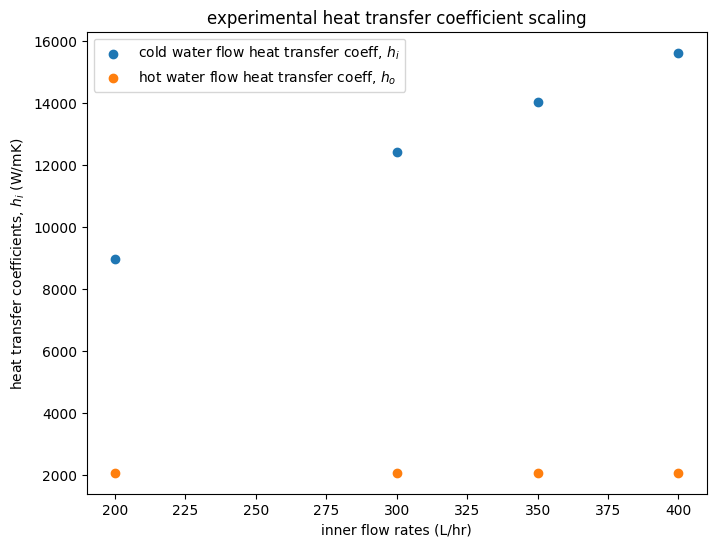

In [2280]:
inner_flows = [200, 300, 350, 400]
h_colds = sorted(h_colds)
plt.figure(figsize=(8,6))
plt.scatter(inner_flows, h_colds, label = "cold water flow heat transfer coeff, $h_i$")
plt.scatter(inner_flows, h_hots, label = "hot water flow heat transfer coeff, $h_o$")
plt.legend()
plt.xlabel("inner flow rates (L/hr)")
plt.ylabel("heat transfer coefficients, $h_i$ (W/mK)")
plt.title("experimental heat transfer coefficient scaling")

In [2281]:
U_theory

[np.float64(3002.05466502203),
 np.float64(3308.948889981573),
 np.float64(3414.646575233601),
 np.float64(3500.9758901851815)]

Plotting this on log-log scale to see the scaling

(np.float64(0.8000000000000026), np.float64(3.882718645459844e-15))

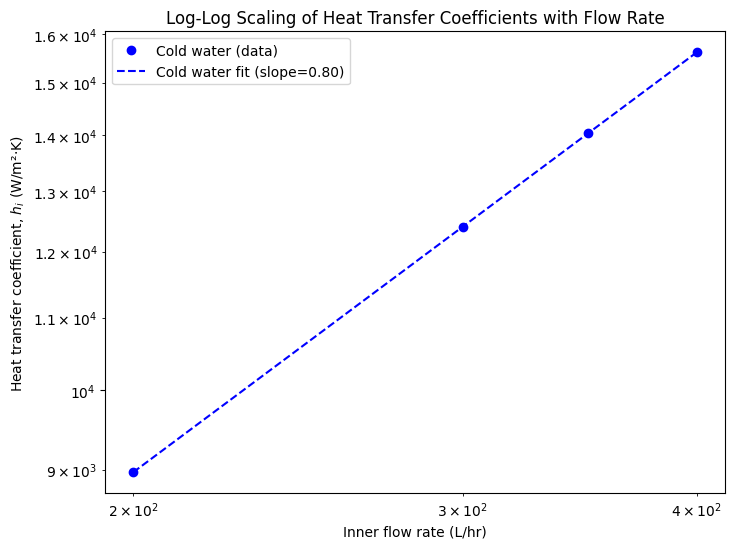

In [2282]:
inner_flows = np.array(inner_flows)

log_flows = np.log(inner_flows)
log_h_colds = np.log(h_colds)
log_h_hots = np.log(h_hots)

slope_cold, intercept_cold = np.polyfit(log_flows, log_h_colds, 1)
slope_hot, intercept_hot = np.polyfit(log_flows, log_h_hots, 1)

flow_range = np.linspace(inner_flows.min(), inner_flows.max(), 100)
fit_h_colds = np.exp(intercept_cold) * flow_range ** slope_cold
fit_h_hots = np.exp(intercept_hot) * flow_range ** slope_hot

plt.figure(figsize=(8, 6))
plt.loglog(inner_flows, h_colds, 'bo', label='Cold water (data)')
plt.loglog(flow_range, fit_h_colds, 'b--', label=f'Cold water fit (slope={slope_cold:.2f})')

# plt.loglog(inner_flows, h_hots, 'ro', label='Hot water (data)')
# plt.loglog(flow_range, fit_h_hots, 'r--', label=f'Hot water fit (slope={slope_hot:.2f})')

plt.xlabel("Inner flow rate (L/hr)")
plt.ylabel("Heat transfer coefficient, $h_i$ (W/m²·K)")
plt.title("Log-Log Scaling of Heat Transfer Coefficients with Flow Rate")
plt.legend()

(slope_cold, slope_hot)


Then, we can plot the theoretical correlation between $h$ and flow rate using $Re$ since $Re \propto u = (\frac{\dot q}{A})$. The expected scaling is $h \propto Re^{1/3}$ as given by Sieder–Tate equation (20-27):

$$
\frac{hD}{k} = Nu_D = 0.023 Re_D ^ {0.8} Pr^n
$$




In [2283]:
Reynolds = [df["Re_cold (inner tube)"].mean() for df in dfs]

In the previous part we saw experimental scaling with $h_i \propto Re^{0.8}$, now we can explore the scaling of $h_i$ with inner flow rate

Text(0.5, 1.0, 'Overall theoretical heat transfer coefficient, $U$, scaling')

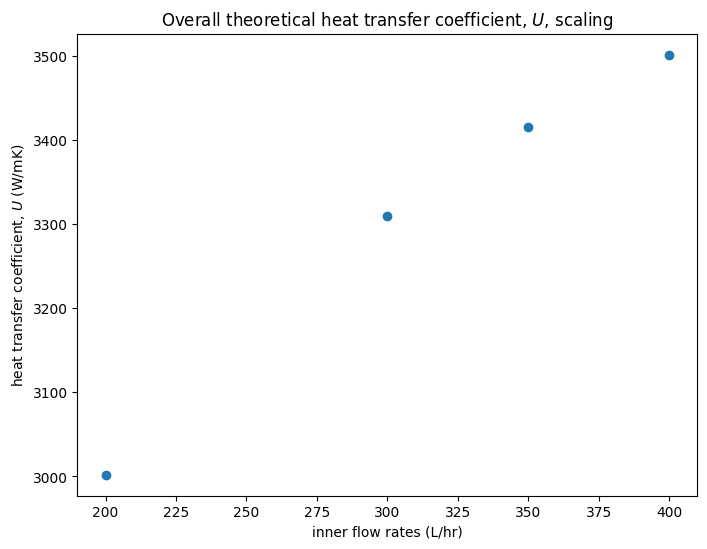

In [2284]:
inner_flows = [200, 300, 350, 400]
plt.figure(figsize=(8,6))
plt.scatter(inner_flows, U_theory, label = "Overall heat transfer coeff")
plt.xlabel("inner flow rates (L/hr)")
plt.ylabel("heat transfer coefficient, $U$ (W/mK)")
plt.title("Overall theoretical heat transfer coefficient, $U$, scaling")

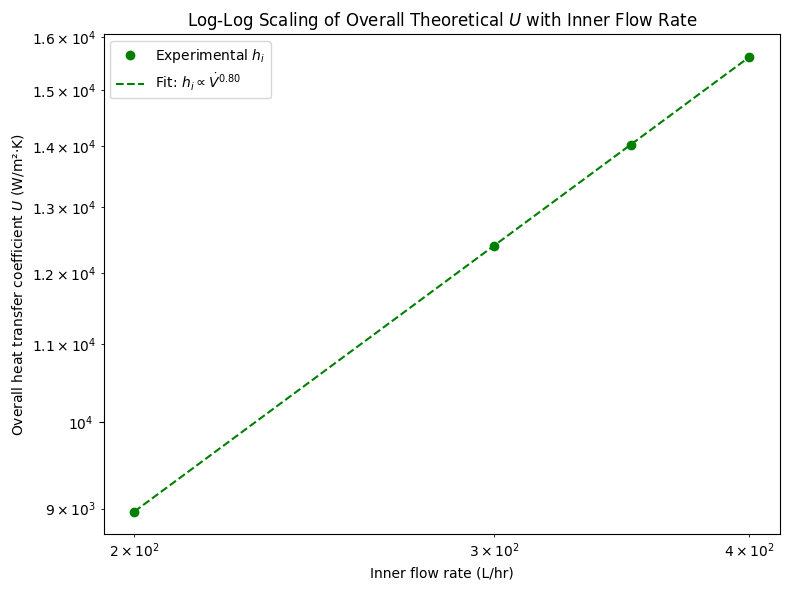

np.float64(0.8000000000000026)

In [2285]:
log_flows = np.log(inner_flows)
log_Us = np.log(h_colds)

slope_U, intercept_U = np.polyfit(log_flows, log_Us, 1)
fit_Us = np.exp(intercept_U) * inner_flows ** slope_U

plt.figure(figsize=(8, 6))
plt.loglog(inner_flows, h_colds, 'go', label='Experimental $h_i$')
plt.loglog(inner_flows, fit_Us, 'g--', label=f'Fit: $h_i \\propto \\dot{{V}}^{{{slope_U:.2f}}}$')

plt.xlabel("Inner flow rate (L/hr)")
plt.ylabel("Overall heat transfer coefficient $U$ (W/m²·K)")
plt.title("Log-Log Scaling of Overall Theoretical $U$ with Inner Flow Rate")
plt.legend()
plt.tight_layout()
plt.show()

slope_U


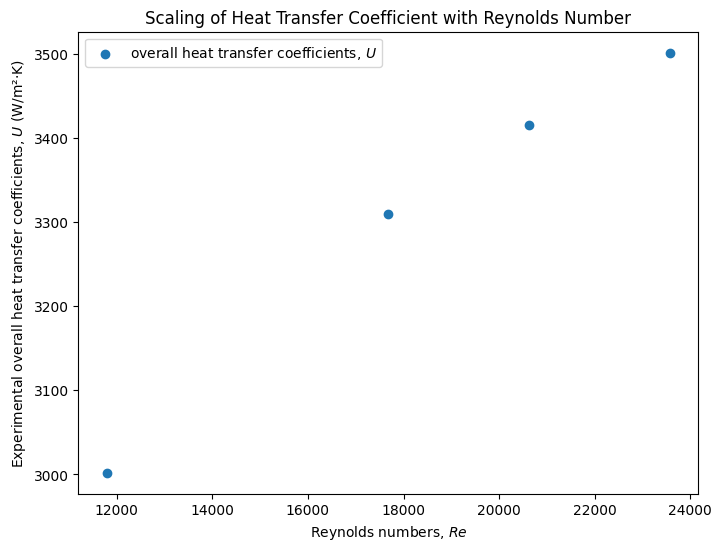

In [2286]:
plt.figure(figsize=(8,6))
plt.scatter(Reynolds, U_theory, label="overall heat transfer coefficients, $U$")
plt.xlabel("Reynolds numbers, $Re$")
plt.ylabel("Experimental overall heat transfer coefficients, $U$ (W/m²·K)")
plt.title("Scaling of Heat Transfer Coefficient with Reynolds Number")
plt.legend()

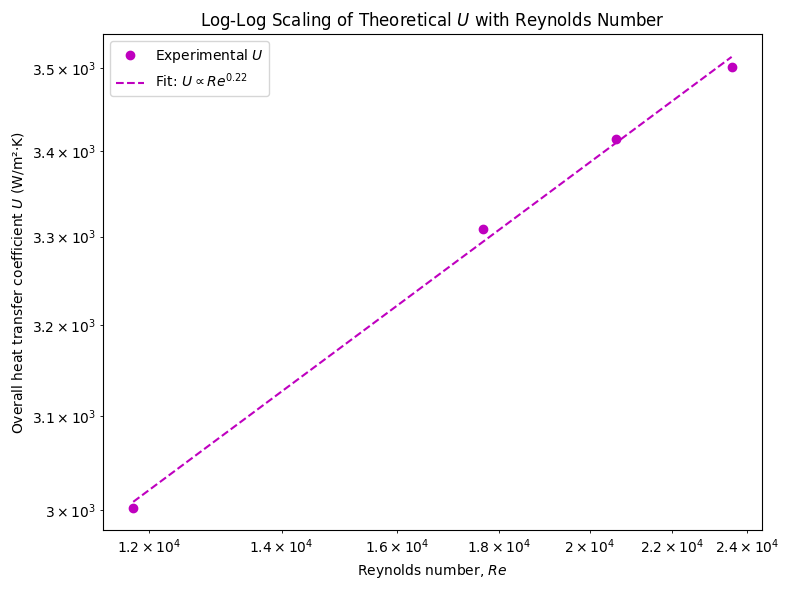

np.float64(0.2240512548698166)

In [2287]:
log_Re = np.log(Reynolds)
log_U = np.log(U_theory)

slope_URe, intercept_URe = np.polyfit(log_Re, log_U, 1)
fit_Us_Re = np.exp(intercept_URe) * Reynolds ** slope_URe

plt.figure(figsize=(8, 6))
plt.loglog(Reynolds, U_theory, 'mo', label='Experimental $U$')
plt.loglog(Reynolds, fit_Us_Re, 'm--', label=f'Fit: $U \\propto Re^{{{slope_URe:.2f}}}$')

plt.xlabel("Reynolds number, $Re$")
plt.ylabel("Overall heat transfer coefficient $U$ (W/m²·K)")
plt.title("Log-Log Scaling of Theoretical $U$ with Reynolds Number")
plt.legend()
plt.tight_layout()
plt.show()

slope_URe


Now we will explore the experimental values for $h_i$ using newton's law of cooling

$$
h = \frac{q}{A \times \Delta T_{avg}}
$$

We will need a temperature gradient for the hot and cold flow

In [2288]:
cold_thermocouples = ["T1 (°C)", "T5 (°C)", "T7 (°C)", "T9 (°C)",1]   # cold water path
hot_thermocouples  = ["T3 (°C)", "T6 (°C)", "T8 (°C)", "T10 (°C)", "T4 (°C)"]  # hot water path
dfs = [df_tube_cross_350h_200c,df_tube_cross_350h_300c, df_tube_cross_350h_350c, df_tube_cross_350h_400c]

In [2289]:
hot_grads = []
cold_grads = []

for df in dfs:
    positions = np.arange(0.800, 2.400, 1.600 / 5)

    cold_means = [df[col].mean() for col in cold_thermocouples]
    hot_means = [df[col].mean() for col in hot_thermocouples]

    print(cold_means)
    print(positions)
    cold_fit = np.poly1d(np.polyfit(positions, cold_means, 1))
    hot_fit = np.poly1d(np.polyfit(positions, hot_means, 1))
    cold_grads.append(cold_fit[1])
    hot_grads.append(hot_fit[1])

    plt.figure(figsize=(10, 6))
    plt.scatter(positions, cold_means, color='blue', label="Cold water path")
    plt.plot(positions, cold_fit(positions), 'b--', label="Cold trendline")

    plt.scatter(positions, hot_means, color='red', label="Hot water path")
    plt.plot(positions, hot_fit(positions), 'r--', label="Hot trendline")

    plt.xlabel("Position along heat exchanger (m)")
    plt.ylabel("Average Temperature (°C)")
    plt.title("Temperature Profile Along Heat Exchanger")
    plt.legend()
    plt.tight_layout()
    plt.show()


KeyError: 1

In [ ]:
h_exp_colds = []
h_exp_hots = []

for i, df in enumerate(dfs):
    h_exp_colds.append(df["dQm/dt (kW)"].mean() / (A_i * cold_grads[i]))
    h_exp_hots.append(df["dQm/dt (kW)"].mean() / (A_h * hot_grads[i]))

h_exp_colds = sorted(h_exp_colds)

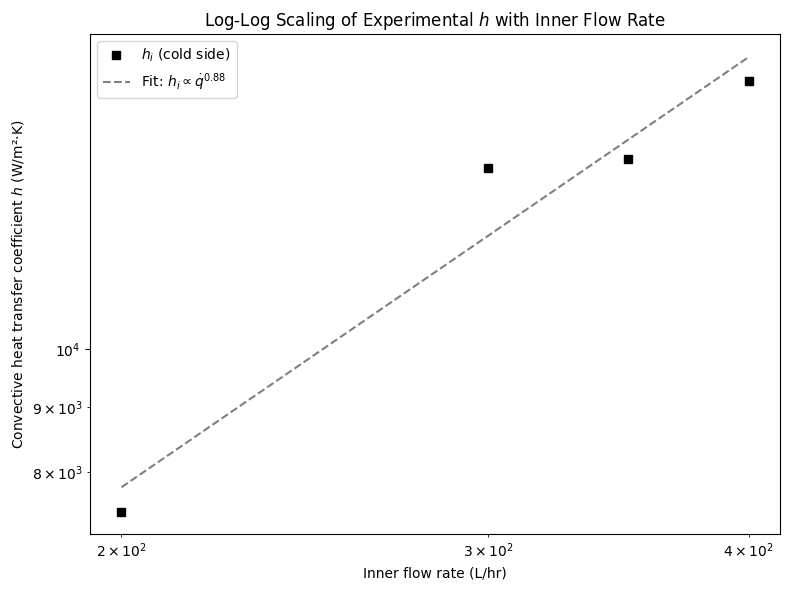

In [ ]:
log_flows = np.log(inner_flows)

log_h_colds = np.log(h_exp_colds)
slope_cold, intercept_cold = np.polyfit(log_flows, log_h_colds, 1)
fit_h_colds = np.exp(intercept_cold) * inner_flows ** slope_cold

log_h_hots = np.log(h_exp_hots)
slope_hot, intercept_hot = np.polyfit(log_flows, log_h_hots, 1)
fit_h_hots = np.exp(intercept_hot) * inner_flows ** slope_hot

plt.figure(figsize=(8, 6))
plt.loglog(inner_flows, h_exp_colds, 's', color='black', label='$h_i$ (cold side)')
plt.loglog(inner_flows, fit_h_colds, '--', color='gray', label=f'Fit: $h_i \\propto \\dot{{q}}^{{{1/slope_cold:.2f}}}$')

# plt.loglog(inner_flows, h_exp_hots, 'o', color='dimgray', label='$h_o$ (hot side)')
# plt.loglog(inner_flows, fit_h_hots, '--', color='darkgray', label=f'Fit: $h_o \\propto \\dot{{q}}^{{{1/slope_hot:.2f}}}$')

plt.xlabel("Inner flow rate (L/hr)")
plt.ylabel("Convective heat transfer coefficient $h$ (W/m²·K)")
plt.title("Log-Log Scaling of Experimental $h$ with Inner Flow Rate")
plt.legend()
plt.tight_layout()
plt.show()


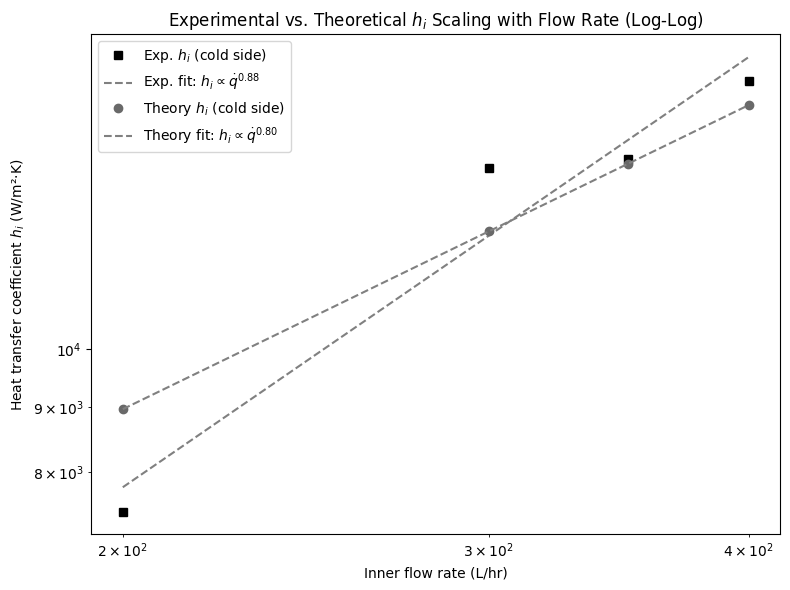

In [ ]:
log_flows_exp = np.log(inner_flows)
log_h_exp_colds = np.log(h_exp_colds)
slope_exp_cold, intercept_exp_cold = np.polyfit(log_flows_exp, log_h_exp_colds, 1)
fit_h_exp_colds = np.exp(intercept_exp_cold) * inner_flows ** slope_exp_cold

log_flows_theory = np.log(inner_flows)
log_h_theory_colds = np.log(h_colds)
slope_theory_cold, intercept_theory_cold = np.polyfit(log_flows_theory, log_h_theory_colds, 1)
flow_range = np.linspace(min(inner_flows), max(inner_flows), 100)
fit_h_theory_colds = np.exp(intercept_theory_cold) * flow_range ** slope_theory_cold

plt.figure(figsize=(8, 6))
plt.loglog(inner_flows, h_exp_colds, 's', color='black', label='Exp. $h_i$ (cold side)')
plt.loglog(inner_flows, fit_h_exp_colds, '--', color='gray', label=f'Exp. fit: $h_i \\propto \\dot{{q}}^{{{1/slope_exp_cold:.2f}}}$')

plt.loglog(inner_flows, h_colds, 'o', color='dimgray', label='Theory $h_i$ (cold side)')
plt.loglog(flow_range, fit_h_theory_colds, '--', color='gray', label=f'Theory fit: $h_i \\propto \\dot{{q}}^{{{slope_theory_cold:.2f}}}$')

plt.xlabel("Inner flow rate (L/hr)")
plt.ylabel("Heat transfer coefficient $h_i$ (W/m²·K)")
plt.title("Experimental vs. Theoretical $h_i$ Scaling with Flow Rate (Log-Log)")
plt.legend()
plt.tight_layout()
plt.show()


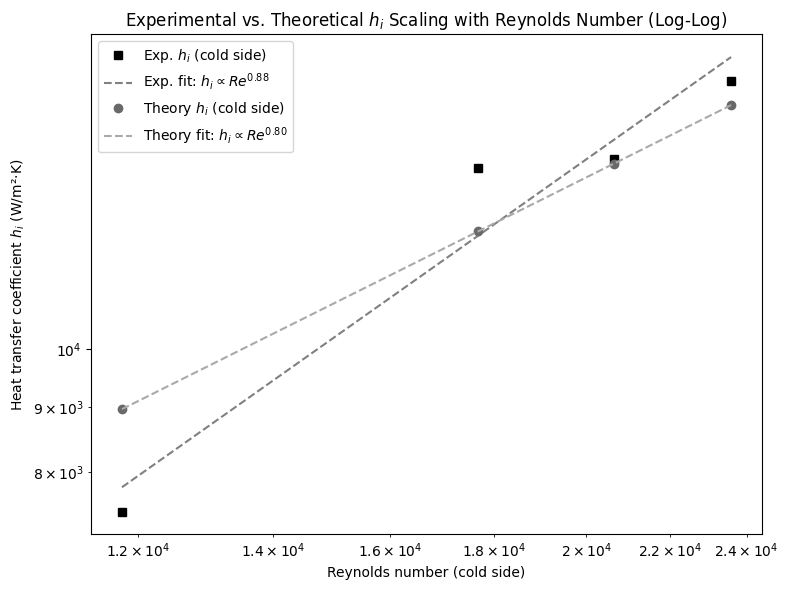

In [ ]:
log_Re_exp = np.log(Reynolds)
log_h_exp_colds = np.log(h_exp_colds)
slope_exp_cold, intercept_exp_cold = np.polyfit(log_Re_exp, log_h_exp_colds, 1)
fit_h_exp_colds = np.exp(intercept_exp_cold) * Reynolds ** slope_exp_cold

log_h_theory_colds = np.log(h_colds)
slope_theory_cold, intercept_theory_cold = np.polyfit(log_Re_exp, log_h_theory_colds, 1)
flow_range_re = np.linspace(min(Reynolds), max(Reynolds), 100)
fit_h_theory_colds = np.exp(intercept_theory_cold) * flow_range_re ** slope_theory_cold


plt.figure(figsize=(8, 6))
plt.loglog(Reynolds, h_exp_colds, 's', color='black', label='Exp. $h_i$ (cold side)')
plt.loglog(Reynolds, fit_h_exp_colds, '--', color='gray',
           label=f'Exp. fit: $h_i \\propto Re^{{{1/slope_exp_cold:.2f}}}$')

plt.loglog(Reynolds, h_colds, 'o', color='dimgray', label='Theory $h_i$ (cold side)')
plt.loglog(flow_range_re, fit_h_theory_colds, '--', color='darkgray',
           label=f'Theory fit: $h_i \\propto Re^{{{slope_theory_cold:.2f}}}$')

plt.xlabel("Reynolds number (cold side)")
plt.ylabel("Heat transfer coefficient $h_i$ (W/m²·K)")
plt.title("Experimental vs. Theoretical $h_i$ Scaling with Reynolds Number (Log-Log)")
plt.legend()
plt.tight_layout()
plt.show()


Now with now log log scaling, let's plot $h_i$ against inner flow

In [2291]:
h_hots

[np.float64(2082.9374751348064),
 np.float64(2082.9374751348064),
 np.float64(2082.9374751348064),
 np.float64(2082.9374751348064)]

Text(0, 0.5, 'Heat transfer coefficient $h_i$ (W/m²·K)')

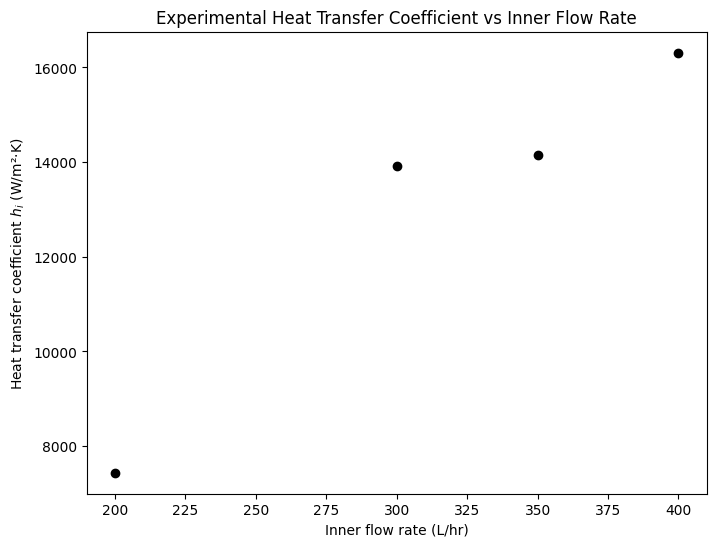

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(inner_flows, h_exp_colds, color='black')
plt.title("Experimental Heat Transfer Coefficient vs Inner Flow Rate")
plt.xlabel("Inner flow rate (L/hr)")
plt.ylabel("Heat transfer coefficient $h_i$ (W/m²·K)")

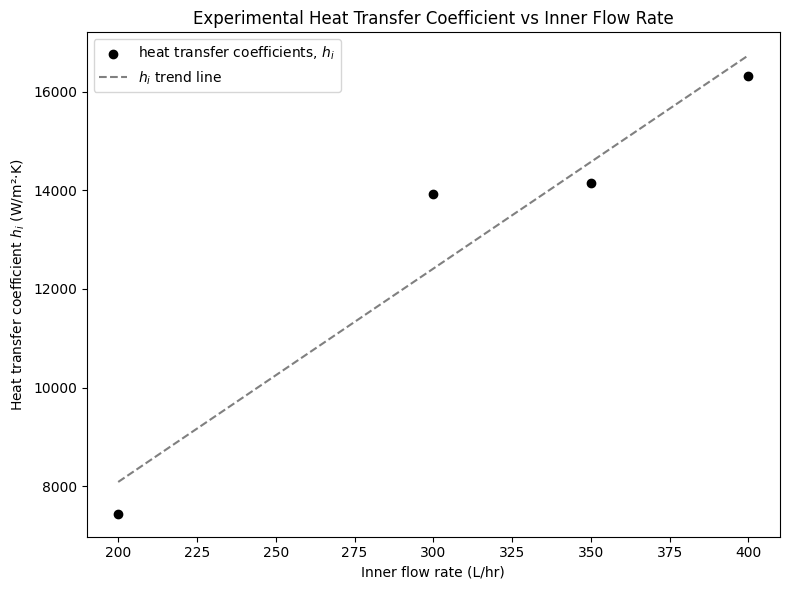

In [ ]:
coeffs = np.polyfit(inner_flows, h_exp_colds, 1)
fit_line = np.poly1d(coeffs)
fit_vals = fit_line(inner_flows)

plt.figure(figsize=(8, 6))
plt.scatter(inner_flows, h_exp_colds, color='black', label='heat transfer coefficients, $h_i$')
plt.plot(inner_flows, fit_vals, color='gray', linestyle='--', label='$h_i$ trend line')

plt.title("Experimental Heat Transfer Coefficient vs Inner Flow Rate")
plt.xlabel("Inner flow rate (L/hr)")
plt.ylabel("Heat transfer coefficient $h_i$ (W/m²·K)")
plt.legend()
plt.tight_layout()
plt.show()


# Analysis Question 4

For the tubular heat exchanger,

(a) Experimentally measure the temperature profile along the length of the tubular heat exchanger for both co-current and counter-current flows at a volumetric flow rate of 350 L/hr. 

#### Get the relevant data frames

In [ ]:
df350h_350c = pd.read_csv('tube_counter_350h_350c.csv')
df350h_350c = df350h_350c.iloc[3:].reset_index(drop=True)
df350h_350c.columns = df350h_350c.iloc[0]

# Remove the original first row (which is now the header)
df350h_350c = df350h_350c[1:]


df350h_350c.head()

FileNotFoundError: [Errno 2] No such file or directory: 'tubular_cross_data/tubular_counter_350c_300h - tubular_counter_350c_300h.csv'

In [ ]:
tube_parallel_350h_350c = pd.read_csv('tube_parallel_350h_350c.csv')
tube_parallel_350h_350c = tube_parallel_350h_350c.dropna().reset_index(drop=True)
new_headers = tube_parallel_350h_350c.iloc[0]
tube_parallel_350h_350c = tube_parallel_350h_350c[1:]
tube_parallel_350h_350c.columns = new_headers
tube_parallel_350h_350c.head()

#### Define functions to grab hot and cold water temps

def grab_hot_temps(df):
    df = df.drop(columns="Time")
    #t_columns = [col for col in df.columns if col.startswith('T')]
    #df = df[t_columns]
    df = df.apply(pd.to_numeric, errors='coerce')
    column_means_series = df.mean()
    df = column_means_series.to_frame().T
    columns_to_extract = [
    "T1 (°C)",
    "T5 (°C)",
    "T7 (°C)",
    "T9 (°C)",
    "T2 (°C)"
]
    df = df[columns_to_extract]
    first_row_series = df.iloc[0]
    hot_temps = first_row_series.to_numpy()
    return hot_temps

def grab_cold_temps(df):
    df = df.drop(columns="Time")
    #t_columns = [col for col in df.columns if col.startswith('T')]
    #df = df[t_columns]
    df = df.apply(pd.to_numeric, errors='coerce')
    column_means_series = df.mean()
    df = column_means_series.to_frame().T
    columns_to_extract = [
    "T3 (°C)",
    "T6 (°C)",
    "T8 (°C)",
    "T10 (°C)",
    "T4 (°C)"
]
    df = df[columns_to_extract]
    first_row_series = df.iloc[0]
    cold_temps = first_row_series.to_numpy()
    return cold_temps

Getting the temperatures


In [ ]:
HOT_counter = grab_hot_temps(df350h_350c)
COLD_counter = grab_cold_temps(df350h_350c)

HOT_parallel = grab_hot_temps(tube_parallel_350h_350c)
COLD_parallel = grab_cold_temps(tube_parallel_350h_350c)
print(HOT_parallel)
print(COLD_parallel)
df350h_350c

NameError: name 'grab_hot_temps' is not defined

In [ ]:
distances = np.array([0,800,800*2,800*3,800*4]) * (1/1000) #meters
print(distances)

[0.  0.8 1.6 2.4 3.2]


In [ ]:
plt.figure(figsize=(10, 8))

plt.errorbar(distances, HOT_parallel, yerr=0.28, label='Hot Water (Parallel)', 
             fmt='^', color="black", capsize=3, ecolor='gray')
plt.errorbar(distances, COLD_parallel, yerr=0.28, label='Cold Water (Parallel)', 
             fmt='o', color="black", capsize=3, ecolor='gray')

# Add labels and title
plt.xlabel('Position Along Length of Exchanger (m)', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.title('Hot and Cold Water Temperature Profiles for Parallel Flow', fontsize=18)

# Add a legend
plt.legend()

# Explicitly turn off grid
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'HOT_parallel' is not defined

<Figure size 1000x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))

plt.errorbar(distances, HOT_counter, yerr=0.28, label='Hot Water (Counter)', 
             fmt='^', color="black", capsize=3, ecolor='gray')
plt.errorbar(distances, COLD_counter, yerr=0.28, label='Cold Water (Counter)', 
             fmt='o', color="black", capsize=3, ecolor='gray')

# Add labels and title
plt.xlabel('Position Along Length of Exchanger (m)', fontsize=16)
plt.ylabel('Temperature (°C)', fontsize=16)
plt.title('Hot and Cold Water Temperature Profiles for Counter Flow', fontsize=18)

# Add a legend
plt.legend()

# Explicitly turn off grid
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

### Part (b)
Derive the theoretical temperature profiles for both configurations based on energy
balances and assumptions such as negligible heat loss, steady-state operation, and
uniform flow conditions.

#### Assumptions
- Negligible heat loss: Perfect insulation (No heat exchanged with surroundings)
- Steady-state
- Uniform flow conditions: Fluid velocity and temperature are uniform across any given cross section
- Constant specific heats $(c_p)$ remain constant over the temperature range

#### Energy Balance

Hot fluid:

$dq = -\dot m_h c_{p,h} dT_h$ (Eqn. 1)

Cold fluid:

$dq = \pm \dot m_c c_{p,c} dT_c$ (Eqn. 2)

where + is parallel and - is counter

Newton's law of cooling:

$dq = U(T_h-T_c)dA = U(T_h - T_c)Pdx$ (Eqn. 3)

where dA is the differential heat transfer area and P is the tube perimeter
#### Parallel Flow
#### Combine (1), (2), (3)

$\frac{d}{dx}(T_h - T_c) = -UP(\frac{1}{\dot m_h c_{p,h}} + \frac{1}{\dot m_c c_[p,c]}(T_h - T_c)$ (Eqn. 4)

$\Delta T(x) = T_h(x) - T_c(x) \implies \frac{d(\Delta T)}{dx} = -(\frac{UP}{C_R})\Delta T$ (Eqn. 5)

where

$\frac{1}{C_R} = \frac{1}{\dot m_h c_{p_h}}+ \frac{1}{\dot m_c c_{p,c}}$ (Eqn. 6)

#### Integrate to obtain temperature profile for parallel flow

$\Delta T = (T_{h,i}-T_{c,i}) e^{\frac{UPx}{C_R}}$ (Eqn. 8)

#### Counter Flow
The boundary conditions change.

$(\Delta T)_0 = T_{h,i} - T_{c,o}$

$\Delta T(L) = T_{h,o} - T_{c,i}$

#### Derived temperature profile for counter flow

$\Delta T = (T_{h,i}-T_{c,o}) e^{\frac{UPx}{C_R}}$ (Eqn. 8)}$

### Part (c)

Compare the theoretical temperature profiles with the experimentally obtained
results, highlighting any deviations and their possible causes.ns

#### Experimental temperature difference profile

In [ ]:
plt.figure(figsize=(5,5))

plt.errorbar(distances, HOT_parallel - COLD_parallel, yerr=0.28, label='$\Delta T$', 
             fmt='^', color="black", capsize=3, ecolor='gray')

# Add labels and title
plt.xlabel('Position Along Length of Exchanger (m)', fontsize=16)
plt.ylabel('Temperature Difference (°C)', fontsize=16)
plt.title('Temperature Difference Profile for Parallel Flow', fontsize=18)

# Add a legend
plt.legend()

# Explicitly turn off grid
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'HOT_parallel' is not defined

<Figure size 500x500 with 0 Axes>

In [ ]:
plt.figure(figsize=(5,5))

plt.errorbar(distances, HOT_counter - COLD_counter, yerr=0.28, label='$\Delta T$', 
             fmt='o', color="black", capsize=3, ecolor='gray')

# Add labels and title
plt.xlabel('Position Along Length of Exchanger (m)', fontsize=16)
plt.ylabel('Temperature Difference (°C)', fontsize=16)
plt.title('Hot and Cold Water Temperature Profiles for Counter Flow', fontsize=18)

# Add a legend
plt.legend()

# Explicitly turn off grid
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'HOT_counter' is not defined

<Figure size 500x500 with 0 Axes>

In [ ]:
def Delta_T_parallel(T_hi, T_ci, U, P, x, C_R):
    return (T_hi-T_ci)*np.exp((-U*P*x)/C_R)

def Delta_T_counter(T_hi, T_co, U, P, x, C_R):
    return (T_hi-T_co)*np.exp((U*P*x)/C_R)

In [ ]:
C = 350/1000 * c_p
C_R = (2/C)**-1

P = np.pi * 0.013
C_R

In [ ]:
print(HOT_parallel)
print(COLD_parallel)
print(HOT_counter)
print(COLD_counter)

In [ ]:
Delta_T_pal = Delta_T_parallel(42.622,19.654,7442.785525320217,P,distances,C_R)
Delta_T_con = Delta_T_counter(32.816, 30.006, 8014, P, distances, C_R)
print(Delta_T_pal)
print(Delta_T_con)

In [ ]:
plt.figure(figsize=(5,5))

plt.errorbar(distances, Delta_T_pal, yerr=0.28, label='Theoretical', 
             fmt='o', color="black", capsize=3, ecolor='gray')
plt.errorbar(distances, HOT_parallel - COLD_parallel, yerr=0.28, label='Experimental', 
             fmt='^', color="black", capsize=3, ecolor='gray')

# Add labels and title
plt.xlabel('Position Along Length of Exchanger (m)', fontsize=16)
plt.ylabel('Temperature Difference (°C)', fontsize=16)
plt.title('Experimental vs Theoretical Temperature Difference Profile for Parallel Flow', fontsize=18)

# Add a legend
plt.legend()

# Explicitly turn off grid
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(5,5))

plt.errorbar(distances, Delta_T_con, yerr=0.28, label='Theoretical', 
             fmt='o', color="black", capsize=3, ecolor='gray')

plt.errorbar(distances, HOT_counter - COLD_counter, yerr=0.28, label='Experimental', 
              fmt='^', color="black", capsize=3, ecolor='gray')

# Add labels and title
plt.xlabel('Position Along Length of Exchanger (m)', fontsize=16)
plt.ylabel('Temperature Difference (°C)', fontsize=16)
plt.title('Experimental vs Theoretical Temperature Difference for Counter Flow', fontsize=18)

# Add a legend
plt.legend()

# Explicitly turn off grid
plt.grid(False)

# Show the plot
plt.tight_layout()
plt.show()